In [1]:
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
import warnings; warnings.simplefilter('ignore')
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix
import time
import seaborn as sn
from string import ascii_uppercase
import os

%matplotlib inline

In [3]:
# DE genes
path_de_brca = "/home/leos/LST/DE-genes-csvs-DESeq2/BRCA112samples_DESeq2_DEgenes.csv"
path_de_coadread = "/home/leos/LST/DE-genes-csvs-DESeq2/coadread_DESeq2_DEgenes.csv"
path_de_kipan = "/home/leos/LST/DE-genes-csvs-DESeq2/kipan_DESeq2_DEgenes.csv"
path_de_sarc = "/home/leos/LST/DE-genes-csvs-DESeq2/sarc_DESeq2_DEgenes.csv"
path_de_thca = "/home/leos/LST/DE-genes-csvs-DESeq2/thca_DESeq2_DEgenes.csv"
path_de_thym = "/home/leos/LST/DE-genes-csvs-DESeq2/thym_DESeq2_DEgenes.csv"
path_de_ucec = "/home/leos/LST/DE-genes-csvs-DESeq2/ucec_DESeq2_DEgenes.csv"
df_de_brca = pd.read_csv(path_de_brca)
df_de_coadread = pd.read_csv(path_de_coadread)
df_de_kipan = pd.read_csv(path_de_kipan)
df_de_sarc = pd.read_csv(path_de_sarc)
df_de_thca = pd.read_csv(path_de_thca)
df_de_thym = pd.read_csv(path_de_thym)
df_de_ucec = pd.read_csv(path_de_ucec)

In [4]:
de_genes_brca = df_de_brca['Gene']
de_genes_coadread = df_de_coadread['Gene']
de_genes_kipan = df_de_kipan['Gene']
de_genes_sarc = df_de_sarc['Gene']
de_genes_thca = df_de_thca['Gene']
de_genes_thym = df_de_thym['Gene']
de_genes_ucec = df_de_ucec['Gene']

In [3]:
# Initialize paths
# UNPROCESSED DATASETS
# path_ductal = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/brca/brca_rsem_unprocessed/brca_ductal_rsem_unprocessed.csv"
# path_lobular = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/brca/brca_rsem_unprocessed/brca_lobular_rsem_unprocessed.csv"
# path_colon_adeno = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/coadread/coadread_rsem_unprocessed/colon_adenocarcinoma_rsem_unprocessed.csv"
# path_colon_mucinous = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/coadread/coadread_rsem_unprocessed/colon_mucinous_adenocarcinoma_rsem_unprocessed.csv"
# path_rectal_adeno = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/coadread/coadread_rsem_unprocessed/rectal_adenocarcinoma_rsem_unprocessed.csv"
# path_kidney_chromo = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/kipan/kipan_rsem_unprocessed/kidney_chromophobe_rsem_processed.csv"
# path_kidney_clear_cell = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/kipan/kipan_rsem_unprocessed/kidney_clear_cell_renal_carcinoma_rsem_processed.csv"
# path_kidney_renal_cell = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/kipan/kipan_rsem_unprocessed/kidney_papillary_renal_cell_carcinoma_rsem_processed.csv"
# path_lgg_astro = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/lgg/lgg_rsem_unprocessed/astrocytoma_rsem_unprocessed.csv"
# path_lgg_oligoastro = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/lgg/lgg_rsem_unprocessed/oligoastrocytoma_rsem_unprocessed.csv"
# path_lgg_oligodendro = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/lgg/lgg_rsem_unprocessed/oligodendroglioma_rsem_unprocessed.csv"
# path_meso_biphasic = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/meso/meso_rsem_unprocessed/biphasic_mesothelioma_rsem_unprocessed.csv"
# path_meso_epithelioid = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/meso/meso_rsem_unprocessed/epithelioid_mesothelioma_rsem_unprocessed.csv"
# path_sarc_leiomyosarcoma = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/sarc/sarc_rsem_unprocessed/leiomyosarcoma_rsem_unprocessed.csv"
# path_sarc_liposarcoma = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/sarc/sarc_rsem_unprocessed/dedifferentiated_liposarcoma_rsem_unprocessed.csv"
# path_sarc_pleomorphic = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/sarc/sarc_rsem_unprocessed/pleomorphic_mfh_rsem_unprocessed.csv"
# path_sarc_myxofibrosarcoma = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/sarc/sarc_rsem_unprocessed/myxofibrosarcoma_rsem_unprocessed.csv"
# path_sarc_un_pleomorphic = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/sarc/sarc_rsem_unprocessed/undifferentiated_pleomorphic_sarcoma_rsem_unprocessed.csv"
# path_sarc_nerve_sheath = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/sarc/sarc_rsem_unprocessed/malignant_peripheral_nerve_sheath_tumors_rsem_unprocessed.csv"
# path_thca_classical = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/thca/thca_rsem_unprocessed/thyroid_papillary_carcinoma_classical_rsem_unprocessed.csv"
# path_thca_follicular = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/thca/thca_rsem_unprocessed/thyroid_papillary_carcinoma_follicular_rsem_unprocessed.csv"
# path_thca_tall_cell = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/thca/thca_rsem_unprocessed/thyroid_papillary_carcinoma_tall_cell_rsem_unprocessed.csv"
# path_thym_a = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/thym/thym_rsem_unprocessed/thymoma_type_a_rsem_unprocessed.csv"
# path_thym_ab = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/thym/thym_rsem_unprocessed/thymoma_type_ab_rsem_unprocessed.csv"
# path_thym_b1 = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/thym/thym_rsem_unprocessed/thymoma_type_b1_rsem_unprocessed.csv"
# path_thym_b2 = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/thym/thym_rsem_unprocessed/thymoma_type_b2_rsem_unprocessed.csv"
# path_thym_b3 = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/thym/thym_rsem_unprocessed/thymoma_type_b3_rsem_unprocessed.csv"
# path_thym_c = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/thym/thym_rsem_unprocessed/thymoma_type_c_rsem_unprocessed.csv"
# path_ucec_endometrial = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/ucec/ucec_rsem_unprocessed/endometrioid_endometrial_adenocarcinoma_rsem_unprocessed.csv"
# path_ucec_mixed_serous = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/ucec/ucec_rsem_unprocessed/mixed_serous_and_endometrioid_rsem_unprocessed.csv"
# path_ucec_serous_endo = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/ucec/ucec_rsem_unprocessed/serous_endometrial_adenocarcinoma_rsem_unprocessed.csv"
# path_ucs_mixed = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/usc/ucs_rsem_unprocessed/malignant_mixed_mullerian_tumor_rsem_unprocessed.csv"
# path_ucs_heterologous = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/ucs/ucs_rsem_unprocessed/mmmt_heterologous_type_rsem_unprocessed.csv"
# path_ucs_homologous = "~/LST/rnaseqV2data/unprocessed_rnaseqV2/ucs/ucs_rsem_unprocessed/mmmt_homologous_type_rsem_unprocessed.csv"

# PROCESSED DATASETS
path_ductal = "~/LST/rnaseqV2data/processed_rnaseqV2/brca/brca_rsem_processed/brca_ductal_rsem_processed.csv"
path_lobular = "~/LST/rnaseqV2data/processed_rnaseqV2/brca/brca_rsem_processed/brca_lobular_rsem_processed.csv"
path_colon_adeno = "~/LST/rnaseqV2data/processed_rnaseqV2/coadread/coadread_rsem_processed/colon_adenocarcinoma_rsem_processed.csv"
path_colon_mucinous = "~/LST/rnaseqV2data/processed_rnaseqV2/coadread/coadread_rsem_processed/colon_mucinous_adenocarcinoma_rsem_processed.csv"
path_rectal_adeno = "~/LST/rnaseqV2data/processed_rnaseqV2/coadread/coadread_rsem_processed/rectal_adenocarcinoma_rsem_processed.csv"
path_kidney_chromo = "~/LST/rnaseqV2data/processed_rnaseqV2/kipan/kipan_rsem_processed/kidney_chromophobe_rsem_processed.csv"
path_kidney_clear_cell = "~/LST/rnaseqV2data/processed_rnaseqV2/kipan/kipan_rsem_processed/kidney_clear_cell_renal_carcinoma_rsem_processed.csv"
path_kidney_renal_cell = "~/LST/rnaseqV2data/processed_rnaseqV2/kipan/kipan_rsem_processed/kidney_papillary_renal_cell_carcinoma_rsem_processed.csv"
path_lgg_astro = "~/LST/rnaseqV2data/processed_rnaseqV2/lgg/lgg_rsem_processed/astrocytoma_rsem_processed.csv"
path_lgg_oligoastro = "~/LST/rnaseqV2data/processed_rnaseqV2/lgg/lgg_rsem_processed/oligoastrocytoma_rsem_processed.csv"
path_lgg_oligodendro = "~/LST/rnaseqV2data/processed_rnaseqV2/lgg/lgg_rsem_processed/oligodendroglioma_rsem_processed.csv"
path_meso_biphasic = "~/LST/rnaseqV2data/processed_rnaseqV2/meso/meso_rsem_processed/biphasic_mesothelioma_rsem_processed.csv"
path_meso_epithelioid = "~/LST/rnaseqV2data/processed_rnaseqV2/meso/meso_rsem_processed/epithelioid_mesothelioma_rsem_processed.csv"
path_sarc_leiomyosarcoma = "~/LST/rnaseqV2data/processed_rnaseqV2/sarc/sarc_rsem_processed/leiomyosarcoma_rsem_processed.csv"
path_sarc_liposarcoma = "~/LST/rnaseqV2data/processed_rnaseqV2/sarc/sarc_rsem_processed/dedifferentiated_liposarcoma_rsem_processed.csv"
path_sarc_pleomorphic = "~/LST/rnaseqV2data/processed_rnaseqV2/sarc/sarc_rsem_processed/pleomorphic_mfh_rsem_processed.csv"
path_sarc_myxofibrosarcoma = "~/LST/rnaseqV2data/processed_rnaseqV2/sarc/sarc_rsem_processed/myxofibrosarcoma_rsem_processed.csv"
path_sarc_un_pleomorphic = "~/LST/rnaseqV2data/processed_rnaseqV2/sarc/sarc_rsem_processed/undifferentiated_pleomorphic_sarcoma_rsem_processed.csv"
path_sarc_nerve_sheath = "~/LST/rnaseqV2data/processed_rnaseqV2/sarc/sarc_rsem_processed/malignant_peripheral_nerve_sheath_tumors_rsem_processed.csv"
path_thca_classical = "~/LST/rnaseqV2data/processed_rnaseqV2/thca/thca_rsem_processed/thyroid_papillary_carcinoma_classical_rsem_processed.csv"
path_thca_follicular = "~/LST/rnaseqV2data/processed_rnaseqV2/thca/thca_rsem_processed/thyroid_papillary_carcinoma_follicular_rsem_processed.csv"
path_thca_tall_cell = "~/LST/rnaseqV2data/processed_rnaseqV2/thca/thca_rsem_processed/thyroid_papillary_carcinoma_tall_cell_rsem_processed.csv"
path_thym_a = "~/LST/rnaseqV2data/processed_rnaseqV2/thym/thym_rsem_processed/thymoma_type_a_rsem_processed.csv"
path_thym_ab = "~/LST/rnaseqV2data/processed_rnaseqV2/thym/thym_rsem_processed/thymoma_type_ab_rsem_processed.csv"
path_thym_b1 = "~/LST/rnaseqV2data/processed_rnaseqV2/thym/thym_rsem_processed/thymoma_type_b1_rsem_processed.csv"
path_thym_b2 = "~/LST/rnaseqV2data/processed_rnaseqV2/thym/thym_rsem_processed/thymoma_type_b2_rsem_processed.csv"
path_thym_b3 = "~/LST/rnaseqV2data/processed_rnaseqV2/thym/thym_rsem_processed/thymoma_type_b3_rsem_processed.csv"
path_thym_c = "~/LST/rnaseqV2data/processed_rnaseqV2/thym/thym_rsem_processed/thymoma_type_c_rsem_processed.csv"
path_ucec_endometrial = "~/LST/rnaseqV2data/processed_rnaseqV2/ucec/ucec_rsem_processed/endometrioid_endometrial_adenocarcinoma_rsem_processed.csv"
path_ucec_mixed_serous = "~/LST/rnaseqV2data/processed_rnaseqV2/ucec/ucec_rsem_processed/mixed_serous_and_endometrioid_rsem_processed.csv"
path_ucec_serous_endo = "~/LST/rnaseqV2data/processed_rnaseqV2/ucec/ucec_rsem_processed/serous_endometrial_adenocarcinoma_rsem_processed.csv"
path_ucs_mixed = "~/LST/rnaseqV2data/processed_rnaseqV2/ucs/ucs_rsem_processed/malignant_mixed_mullerian_tumor_rsem_processed.csv"
path_ucs_heterologous = "~/LST/rnaseqV2data/processed_rnaseqV2/ucs/ucs_rsem_processed/mmmt_heterologous_type_rsem_processed.csv"
path_ucs_homologous = "~/LST/rnaseqV2data/processed_rnaseqV2/ucs/ucs_rsem_processed/mmmt_homologous_type_rsem_processed.csv"

In [4]:
def load_datasets(*args):
    """args: paths to csv files"""
    return {key:pd.read_csv(path, sep='\t') for key, path in enumerate(args)}
        
def concat_datasets(*kwargs):
    """kwargs: a dictionary of the dataframes, keys are integers from 0...n""" 
    return pd.concat(kwargs[0].values(), axis=1).transpose()

def create_labels(*kwargs):
    """kwargs: a dictionary of the dataframes, keys are integers from 0...n"""
    df_dict = kwargs[0]
    labels = np.empty(0, dtype=int)
    for i in range(len(df_dict)):
        frame = df_dict[i]
        labels_set = np.empty(len(frame.columns), dtype=int)
        labels_set.fill(i+1)
        labels = np.concatenate((labels, labels_set), axis=0)
        
    return labels

In [164]:
# Binary data sets
#datasets = load_datasets(path_ductal, path_lobular)
#datasets = load_datasets(path_kidney_clear_cell, path_kidney_renal_cell)
#datasets = load_datasets(path_meso_biphasic, path_meso_epithelioid)
#multi = False # comment out if not binary classification

# Multiclass data sets
#datasets = load_datasets(path_colon_adeno, path_colon_mucinous, path_rectal_adeno)
datasets = load_datasets(path_kidney_chromo, path_kidney_clear_cell, path_kidney_renal_cell)
#datasets = load_datasets(path_lgg_astro, path_lgg_oligoastro, path_lgg_oligodendro)
#datasets = load_datasets(path_sarc_leiomyosarcoma, path_sarc_liposarcoma, path_sarc_pleomorphic, path_sarc_myxofibrosarcoma, path_sarc_un_pleomorphic, path_sarc_nerve_sheath)
#datasets = load_datasets(path_thca_classical, path_thca_follicular, path_thca_tall_cell)
#datasets = load_datasets(path_thym_a, path_thym_ab, path_thym_b1, path_thym_b2, path_thym_b3, path_thym_c)
#datasets = load_datasets(path_ucec_endometrial, path_ucec_mixed_serous, path_ucec_serous_endo)
#datasets = load_datasets(path_ucs_mixed, path_ucs_heterologous, path_ucs_homologous)
multi = True # comment out if not multiclass classification

In [165]:
full_data = concat_datasets(datasets)

# Get only DE genes
#full_data = full_data[full_data.columns.intersection(de_genes_brca)] #brca
#full_data = full_data[full_data.columns.intersection(de_genes_coadread)] #coadread
#full_data = full_data[full_data.columns.intersection(de_genes_kipan)] #kipan
#full_data = full_data[full_data.columns.intersection(de_genes_sarc)] #sarc
#full_data = full_data[full_data.columns.intersection(de_genes_thca)] #thca
#full_data = full_data[full_data.columns.intersection(de_genes_thym)] #thym
#full_data = full_data[full_data.columns.intersection(de_genes_ucec)] #ucec

labels = create_labels(datasets)
X_train, X_test, y_train, y_test = train_test_split(full_data, labels, test_size=0.2, random_state=123)
full_data.shape
full_data

,A1BG,A1CF,A2BP1,A2LD1,A2M,A4GALT,A4GNT,AAAS,AACSL,AACS,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
TCGA-KL-8328,33.5025,0.0000,124.6035,33.3303,2618.7087,154.9615,0.4531,1656.5473,0.0000,1313.0947,...,174.8981,212.9089,83.8242,41.6855,394.6534,1503.8514,0.9062,1339.8278,1766.1985,1215.2243
TCGA-KL-8339,55.0631,190.1558,7.8662,3129.6608,21571.2208,1032.5189,2.3940,671.3596,8.2082,736.3409,...,362.8693,206.4833,127.5686,45.4869,185.3677,813.9765,111.8363,1107.0764,2375.2380,619.7165
TCGA-KM-8439,15.2955,0.4370,0.0000,106.4569,5728.2246,1535.6714,0.4370,866.6011,1.7481,725.8822,...,265.2682,147.5800,224.6258,37.1463,308.5327,1262.5369,0.8740,947.4489,2240.5769,900.6883
TCGA-KM-8441,13.1443,0.0000,0.0000,80.0714,12338.6499,743.2166,0.7511,567.0829,0.0000,664.3508,...,370.6694,188.8086,152.8495,93.8879,469.4395,1681.7200,0.3756,1122.8993,4122.0543,1218.6649
TCGA-KM-8442,47.7512,0.0000,0.0000,69.6932,5178.6210,211.0587,0.0000,821.3082,0.0000,559.0020,...,430.2090,412.9804,56.9791,135.8732,916.3857,1920.7687,1.0115,1237.6939,2615.9811,1185.7721
TCGA-KN-8430,62.8172,1.0226,10.5667,210.0861,11862.2582,634.6826,5.1129,788.0699,9.8850,1235.9608,...,287.6864,172.7039,158.8411,60.6732,305.0703,912.1432,14.3161,786.3656,3221.8151,1494.6741
TCGA-KO-8411,11.0755,0.0000,16.6038,48.7811,7221.4642,99.2453,0.0000,899.2453,0.0000,632.4528,...,435.8491,215.8264,87.5472,59.6226,544.1509,1303.0189,0.7547,2282.6415,399.6226,756.9811
TCGA-KL-8323,9.1903,0.0000,0.0000,58.4603,6907.8181,99.3219,0.0000,919.4256,0.0000,633.4264,...,456.3223,579.5572,189.4695,58.6358,414.4396,1127.2437,0.0000,2138.0136,2732.3494,1040.6861
TCGA-KL-8324,48.7646,157.2608,12.0440,1459.5148,34270.7226,1232.2780,4.8176,595.3200,6.8823,587.7495,...,315.2099,206.0874,140.0551,64.0055,299.7247,994.8383,100.1376,1028.2175,4192.3606,925.6710
TCGA-KL-8325,8.0113,1.3352,5.0071,30.9536,4886.1762,63.0890,0.0000,738.7082,0.3338,553.7808,...,447.6312,290.6899,12.3507,80.4468,592.5021,1547.1815,0.6676,3844.0868,760.7393,1195.6859


In [6]:
# THIS CELL IS ONLY FOR HYPERPARAMETER TUNING
# Parameter tuning for XGBoost
#def hyper_param_gsearch(X_test, y_test):
#    """args: dictionary of parameter options"""
#    xgb_classifier = XGBClassifier(learning_rate=0.1, 
#                                   n_estimators=140,
#                                   max_depth=5,
#                                   min_child_weight=1, 
#                                   gamma=0, 
#                                   subsample=0.5, 
#                                   colsample_bytree=0.75,
#                                   objective='count:poisson', 
#                                   nthread=4, 
#                                   scale_pos_weight=1, 
#                                   seed=27)
#    
#    grid_params = {
#        'learning_rate':list(np.linspace(0.04, 0.1, 5)),
#        'max_depth': [4,6,8,10],
#        'min_child_weight':range(1,10,1),
#        'sub_sample':list(np.linspace(0.5, 1, 5))
#        'colsample_bytree':list(np.linspace(0.4, 1, 5))
#    }
#    
#    gsearch = GridSearchCV(estimator=xgb_classifier, 
#                           param_grid=grid_params, 
#                           fit_params=fit_params,
#                           n_jobs=4,
#                           iid=False, 
#                           cv=5)
#    return gsearch

Accuracy: 92.70%
Counter({2: 105, 3: 61, 1: 12})


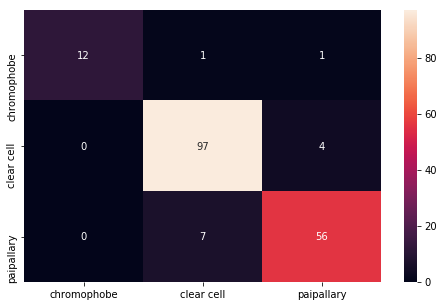

In [166]:
eval_set = [(X_train, y_train), (X_test, y_test)]

model = XGBClassifier(learning_rate=0.1, 
                      n_estimators=200,
                      max_depth=4,
                      min_child_weight=1, 
                      gamma=0, 
                      subsample=0.75, 
                      colsample_bytree=0.75,
                      objective='count:poisson', 
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=123)

eval_metric=["merror", "mlogloss"] if multi else ["error", "logloss"]

model.fit(X_train, 
          y_train, 
          early_stopping_rounds=10,
          eval_metric=eval_metric,
          eval_set=eval_set, 
          verbose=False)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(Counter(predictions))

# Confusion matrix
conf = confusion_matrix(y_test, predictions)

# Specify columns
#columns = ['class {}'.format(i) for i in np.unique(labels)]
#columns = ['ductal', 'lobular']
#columns = ['biphasic', 'epithelioid']
#columns = ['adeno', 'mucinous', 'rectal']
columns = ['chromophobe', 'clear cell', 'paipallary']
#columns = ['astro' , 'oligoastro', 'oligodendro']
#columns = ['lms', 'delipo', 'mfh', 'myxofibro', 'ups', 'mpnst']
#columns = ['classical', 'follicular', 'tall cell']
#columns = ['a1', 'ab', 'b1', 'b2', 'b3', 'c']
#columns = ['endometroid', 'mixed', 'serous']
#columns = ['mmmt', 'mmmt hetero', 'mmmt homo']

df_cm = pd.DataFrame(conf, index=columns, columns=columns)

pyplot.rcParams['figure.figsize'] = [8, 5]
sn.heatmap(df_cm, annot=True, fmt="d");

In [167]:
import datetime
# stratified kfold cross validation
fit_params={"early_stopping_rounds":10, 
            "eval_metric":eval_metric, 
            "eval_set":eval_set}

kfold = StratifiedKFold(n_splits=5, random_state=123)

#accuracies
results = cross_val_score(model, full_data, labels, cv=kfold, fit_params=fit_params, verbose=False)

#predictions
t0 = time.time()
y_pred = cross_val_predict(model, full_data, labels, cv=kfold, fit_params=fit_params, verbose=False)
t1 = time.time()

[0]	validation_0-merror:0.056259	validation_0-mlogloss:0.971779	validation_1-merror:0.050562	validation_1-mlogloss:0.972047
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-merror:0.028129	validation_0-mlogloss:0.864084	validation_1-merror:0.050562	validation_1-mlogloss:0.868167
[2]	validation_0-merror:0.022504	validation_0-mlogloss:0.772759	validation_1-merror:0.039326	validation_1-mlogloss:0.777561
[3]	validation_0-merror:0.018284	validation_0-mlogloss:0.693152	validation_1-merror:0.039326	validation_1-mlogloss:0.700835
[4]	validation_0-merror:0.014065	validation_0-mlogloss:0.625091	validation_1-merror:0.039326	validation_1-mlogloss:0.634041
[5]	validation_0-merror:0.012658	validation_0-mlogloss:0.565672	validation_1-merror:0.039326	validation_1-mlogloss:0.575712
[6]	validation_0-merror:0.015471	validation_0-mlogloss:0.513437	validation_1-merror:0.044

[65]	validation_0-merror:0.009845	validation_0-mlogloss:0.035782	validation_1-merror:0.022472	validation_1-mlogloss:0.075797
[66]	validation_0-merror:0.009845	validation_0-mlogloss:0.035581	validation_1-merror:0.022472	validation_1-mlogloss:0.074937
[67]	validation_0-merror:0.009845	validation_0-mlogloss:0.035021	validation_1-merror:0.022472	validation_1-mlogloss:0.074695
[68]	validation_0-merror:0.009845	validation_0-mlogloss:0.034724	validation_1-merror:0.022472	validation_1-mlogloss:0.075038
[69]	validation_0-merror:0.009845	validation_0-mlogloss:0.034559	validation_1-merror:0.022472	validation_1-mlogloss:0.074471
[70]	validation_0-merror:0.009845	validation_0-mlogloss:0.034231	validation_1-merror:0.022472	validation_1-mlogloss:0.074989
[71]	validation_0-merror:0.009845	validation_0-mlogloss:0.034016	validation_1-merror:0.022472	validation_1-mlogloss:0.075145
[72]	validation_0-merror:0.009845	validation_0-mlogloss:0.033876	validation_1-merror:0.022472	validation_1-mlogloss:0.075042


[49]	validation_0-merror:0.016878	validation_0-mlogloss:0.058118	validation_1-merror:0.022472	validation_1-mlogloss:0.07613
[50]	validation_0-merror:0.016878	validation_0-mlogloss:0.05733	validation_1-merror:0.022472	validation_1-mlogloss:0.07567
[51]	validation_0-merror:0.016878	validation_0-mlogloss:0.05643	validation_1-merror:0.022472	validation_1-mlogloss:0.073867
[52]	validation_0-merror:0.016878	validation_0-mlogloss:0.055918	validation_1-merror:0.022472	validation_1-mlogloss:0.073344
[53]	validation_0-merror:0.016878	validation_0-mlogloss:0.055495	validation_1-merror:0.022472	validation_1-mlogloss:0.072813
[54]	validation_0-merror:0.016878	validation_0-mlogloss:0.054984	validation_1-merror:0.022472	validation_1-mlogloss:0.072212
[55]	validation_0-merror:0.016878	validation_0-mlogloss:0.054552	validation_1-merror:0.022472	validation_1-mlogloss:0.071931
[56]	validation_0-merror:0.016878	validation_0-mlogloss:0.05396	validation_1-merror:0.022472	validation_1-mlogloss:0.071142
[57]	

[115]	validation_0-merror:0.014065	validation_0-mlogloss:0.044898	validation_1-merror:0.022472	validation_1-mlogloss:0.057977
[116]	validation_0-merror:0.014065	validation_0-mlogloss:0.044887	validation_1-merror:0.022472	validation_1-mlogloss:0.057666
[117]	validation_0-merror:0.014065	validation_0-mlogloss:0.044774	validation_1-merror:0.022472	validation_1-mlogloss:0.057613
[118]	validation_0-merror:0.014065	validation_0-mlogloss:0.044756	validation_1-merror:0.022472	validation_1-mlogloss:0.057676
[119]	validation_0-merror:0.014065	validation_0-mlogloss:0.044746	validation_1-merror:0.022472	validation_1-mlogloss:0.05772
[120]	validation_0-merror:0.014065	validation_0-mlogloss:0.044737	validation_1-merror:0.022472	validation_1-mlogloss:0.057704
[121]	validation_0-merror:0.014065	validation_0-mlogloss:0.044619	validation_1-merror:0.022472	validation_1-mlogloss:0.057438
[122]	validation_0-merror:0.014065	validation_0-mlogloss:0.044551	validation_1-merror:0.022472	validation_1-mlogloss:0.

[181]	validation_0-merror:0.014065	validation_0-mlogloss:0.043876	validation_1-merror:0.022472	validation_1-mlogloss:0.054265
[182]	validation_0-merror:0.014065	validation_0-mlogloss:0.043892	validation_1-merror:0.022472	validation_1-mlogloss:0.054081
[183]	validation_0-merror:0.014065	validation_0-mlogloss:0.043853	validation_1-merror:0.022472	validation_1-mlogloss:0.054048
[184]	validation_0-merror:0.014065	validation_0-mlogloss:0.04384	validation_1-merror:0.022472	validation_1-mlogloss:0.053899
[185]	validation_0-merror:0.014065	validation_0-mlogloss:0.043931	validation_1-merror:0.022472	validation_1-mlogloss:0.053644
[186]	validation_0-merror:0.014065	validation_0-mlogloss:0.043917	validation_1-merror:0.022472	validation_1-mlogloss:0.053502
[187]	validation_0-merror:0.014065	validation_0-mlogloss:0.043914	validation_1-merror:0.022472	validation_1-mlogloss:0.053542
[188]	validation_0-merror:0.014065	validation_0-mlogloss:0.043817	validation_1-merror:0.022472	validation_1-mlogloss:0.

[46]	validation_0-merror:0.025316	validation_0-mlogloss:0.076127	validation_1-merror:0.016854	validation_1-mlogloss:0.094752
[47]	validation_0-merror:0.02391	validation_0-mlogloss:0.075507	validation_1-merror:0.016854	validation_1-mlogloss:0.094741
[48]	validation_0-merror:0.02391	validation_0-mlogloss:0.074855	validation_1-merror:0.016854	validation_1-mlogloss:0.094107
[49]	validation_0-merror:0.025316	validation_0-mlogloss:0.07418	validation_1-merror:0.016854	validation_1-mlogloss:0.093206
[50]	validation_0-merror:0.02391	validation_0-mlogloss:0.073119	validation_1-merror:0.016854	validation_1-mlogloss:0.09256
[51]	validation_0-merror:0.02391	validation_0-mlogloss:0.072644	validation_1-merror:0.016854	validation_1-mlogloss:0.092751
[52]	validation_0-merror:0.02391	validation_0-mlogloss:0.072382	validation_1-merror:0.016854	validation_1-mlogloss:0.092905
[53]	validation_0-merror:0.02391	validation_0-mlogloss:0.072271	validation_1-merror:0.016854	validation_1-mlogloss:0.092483
[54]	val

[39]	validation_0-merror:0.015471	validation_0-mlogloss:0.061639	validation_1-merror:0.011236	validation_1-mlogloss:0.060529
[40]	validation_0-merror:0.015471	validation_0-mlogloss:0.059842	validation_1-merror:0.011236	validation_1-mlogloss:0.058078
[41]	validation_0-merror:0.016878	validation_0-mlogloss:0.058211	validation_1-merror:0.011236	validation_1-mlogloss:0.056152
[42]	validation_0-merror:0.016878	validation_0-mlogloss:0.056157	validation_1-merror:0.011236	validation_1-mlogloss:0.054243
[43]	validation_0-merror:0.016878	validation_0-mlogloss:0.054454	validation_1-merror:0.011236	validation_1-mlogloss:0.052196
[44]	validation_0-merror:0.015471	validation_0-mlogloss:0.05285	validation_1-merror:0.011236	validation_1-mlogloss:0.050329
[45]	validation_0-merror:0.014065	validation_0-mlogloss:0.051425	validation_1-merror:0.011236	validation_1-mlogloss:0.048653
[46]	validation_0-merror:0.015471	validation_0-mlogloss:0.050465	validation_1-merror:0.011236	validation_1-mlogloss:0.047395
[

[105]	validation_0-merror:0.014065	validation_0-mlogloss:0.029256	validation_1-merror:0.011236	validation_1-mlogloss:0.020529
[106]	validation_0-merror:0.014065	validation_0-mlogloss:0.029132	validation_1-merror:0.011236	validation_1-mlogloss:0.020366
[107]	validation_0-merror:0.014065	validation_0-mlogloss:0.029034	validation_1-merror:0.011236	validation_1-mlogloss:0.020411
[108]	validation_0-merror:0.014065	validation_0-mlogloss:0.029023	validation_1-merror:0.011236	validation_1-mlogloss:0.020325
[109]	validation_0-merror:0.014065	validation_0-mlogloss:0.028944	validation_1-merror:0.011236	validation_1-mlogloss:0.020053
[110]	validation_0-merror:0.014065	validation_0-mlogloss:0.028857	validation_1-merror:0.011236	validation_1-mlogloss:0.019962
[111]	validation_0-merror:0.014065	validation_0-mlogloss:0.028783	validation_1-merror:0.011236	validation_1-mlogloss:0.019984
[112]	validation_0-merror:0.014065	validation_0-mlogloss:0.028798	validation_1-merror:0.011236	validation_1-mlogloss:0

[171]	validation_0-merror:0.014065	validation_0-mlogloss:0.026821	validation_1-merror:0.005618	validation_1-mlogloss:0.015938
[172]	validation_0-merror:0.014065	validation_0-mlogloss:0.026758	validation_1-merror:0.005618	validation_1-mlogloss:0.015863
[173]	validation_0-merror:0.014065	validation_0-mlogloss:0.026668	validation_1-merror:0.005618	validation_1-mlogloss:0.015884
[174]	validation_0-merror:0.014065	validation_0-mlogloss:0.02671	validation_1-merror:0.005618	validation_1-mlogloss:0.015934
[175]	validation_0-merror:0.014065	validation_0-mlogloss:0.026652	validation_1-merror:0.005618	validation_1-mlogloss:0.015848
[176]	validation_0-merror:0.014065	validation_0-mlogloss:0.026667	validation_1-merror:0.005618	validation_1-mlogloss:0.015791
[177]	validation_0-merror:0.014065	validation_0-mlogloss:0.02664	validation_1-merror:0.005618	validation_1-mlogloss:0.015688
[178]	validation_0-merror:0.014065	validation_0-mlogloss:0.02664	validation_1-merror:0.005618	validation_1-mlogloss:0.01

[36]	validation_0-merror:0.007032	validation_0-mlogloss:0.061646	validation_1-merror:0.022472	validation_1-mlogloss:0.103345
[37]	validation_0-merror:0.007032	validation_0-mlogloss:0.058479	validation_1-merror:0.022472	validation_1-mlogloss:0.100458
[38]	validation_0-merror:0.007032	validation_0-mlogloss:0.056263	validation_1-merror:0.022472	validation_1-mlogloss:0.098878
[39]	validation_0-merror:0.005626	validation_0-mlogloss:0.053785	validation_1-merror:0.022472	validation_1-mlogloss:0.095705
[40]	validation_0-merror:0.005626	validation_0-mlogloss:0.051768	validation_1-merror:0.022472	validation_1-mlogloss:0.093574
[41]	validation_0-merror:0.005626	validation_0-mlogloss:0.050028	validation_1-merror:0.022472	validation_1-mlogloss:0.092827
[42]	validation_0-merror:0.005626	validation_0-mlogloss:0.047826	validation_1-merror:0.022472	validation_1-mlogloss:0.090975
[43]	validation_0-merror:0.005626	validation_0-mlogloss:0.045967	validation_1-merror:0.022472	validation_1-mlogloss:0.089277


[18]	validation_0-merror:0.015471	validation_0-mlogloss:0.184853	validation_1-merror:0.039326	validation_1-mlogloss:0.207821
[19]	validation_0-merror:0.014065	validation_0-mlogloss:0.171876	validation_1-merror:0.033708	validation_1-mlogloss:0.194886
[20]	validation_0-merror:0.014065	validation_0-mlogloss:0.160131	validation_1-merror:0.033708	validation_1-mlogloss:0.18255
[21]	validation_0-merror:0.012658	validation_0-mlogloss:0.149796	validation_1-merror:0.02809	validation_1-mlogloss:0.1705
[22]	validation_0-merror:0.012658	validation_0-mlogloss:0.13958	validation_1-merror:0.02809	validation_1-mlogloss:0.161147
[23]	validation_0-merror:0.012658	validation_0-mlogloss:0.130804	validation_1-merror:0.022472	validation_1-mlogloss:0.153379
[24]	validation_0-merror:0.012658	validation_0-mlogloss:0.12239	validation_1-merror:0.022472	validation_1-mlogloss:0.146215
[25]	validation_0-merror:0.012658	validation_0-mlogloss:0.114666	validation_1-merror:0.022472	validation_1-mlogloss:0.139477
[26]	va

[2]	validation_0-merror:0.025316	validation_0-mlogloss:0.773888	validation_1-merror:0.050562	validation_1-mlogloss:0.782845
[3]	validation_0-merror:0.021097	validation_0-mlogloss:0.695504	validation_1-merror:0.044944	validation_1-mlogloss:0.71192
[4]	validation_0-merror:0.021097	validation_0-mlogloss:0.628402	validation_1-merror:0.033708	validation_1-mlogloss:0.64595
[5]	validation_0-merror:0.019691	validation_0-mlogloss:0.568813	validation_1-merror:0.033708	validation_1-mlogloss:0.587685
[6]	validation_0-merror:0.021097	validation_0-mlogloss:0.516094	validation_1-merror:0.039326	validation_1-mlogloss:0.538019
[7]	validation_0-merror:0.021097	validation_0-mlogloss:0.468775	validation_1-merror:0.039326	validation_1-mlogloss:0.493312
[8]	validation_0-merror:0.021097	validation_0-mlogloss:0.42836	validation_1-merror:0.033708	validation_1-mlogloss:0.453219
[9]	validation_0-merror:0.021097	validation_0-mlogloss:0.390824	validation_1-merror:0.033708	validation_1-mlogloss:0.417509
[10]	valida

[68]	validation_0-merror:0.015471	validation_0-mlogloss:0.049281	validation_1-merror:0.022472	validation_1-mlogloss:0.066494
[69]	validation_0-merror:0.015471	validation_0-mlogloss:0.049218	validation_1-merror:0.022472	validation_1-mlogloss:0.065596
[70]	validation_0-merror:0.016878	validation_0-mlogloss:0.049284	validation_1-merror:0.022472	validation_1-mlogloss:0.06542
[71]	validation_0-merror:0.015471	validation_0-mlogloss:0.048861	validation_1-merror:0.022472	validation_1-mlogloss:0.065292
[72]	validation_0-merror:0.015471	validation_0-mlogloss:0.048709	validation_1-merror:0.022472	validation_1-mlogloss:0.06503
[73]	validation_0-merror:0.015471	validation_0-mlogloss:0.048497	validation_1-merror:0.022472	validation_1-mlogloss:0.064572
[74]	validation_0-merror:0.015471	validation_0-mlogloss:0.048414	validation_1-merror:0.022472	validation_1-mlogloss:0.064354
[75]	validation_0-merror:0.015471	validation_0-mlogloss:0.048008	validation_1-merror:0.022472	validation_1-mlogloss:0.063683
[7

[134]	validation_0-merror:0.014065	validation_0-mlogloss:0.044063	validation_1-merror:0.022472	validation_1-mlogloss:0.056222
[135]	validation_0-merror:0.014065	validation_0-mlogloss:0.044118	validation_1-merror:0.022472	validation_1-mlogloss:0.056103
[136]	validation_0-merror:0.014065	validation_0-mlogloss:0.044174	validation_1-merror:0.022472	validation_1-mlogloss:0.055889
[137]	validation_0-merror:0.014065	validation_0-mlogloss:0.044083	validation_1-merror:0.022472	validation_1-mlogloss:0.055846
[138]	validation_0-merror:0.014065	validation_0-mlogloss:0.044041	validation_1-merror:0.022472	validation_1-mlogloss:0.056057
[139]	validation_0-merror:0.014065	validation_0-mlogloss:0.043944	validation_1-merror:0.022472	validation_1-mlogloss:0.055995
[140]	validation_0-merror:0.014065	validation_0-mlogloss:0.044006	validation_1-merror:0.022472	validation_1-mlogloss:0.05603
[141]	validation_0-merror:0.014065	validation_0-mlogloss:0.044031	validation_1-merror:0.022472	validation_1-mlogloss:0.

[0]	validation_0-merror:0.066104	validation_0-mlogloss:0.976326	validation_1-merror:0.078652	validation_1-mlogloss:0.976217
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-merror:0.045007	validation_0-mlogloss:0.870745	validation_1-merror:0.067416	validation_1-mlogloss:0.879354
[2]	validation_0-merror:0.040788	validation_0-mlogloss:0.780318	validation_1-merror:0.044944	validation_1-mlogloss:0.789084
[3]	validation_0-merror:0.040788	validation_0-mlogloss:0.704111	validation_1-merror:0.044944	validation_1-mlogloss:0.714122
[4]	validation_0-merror:0.036568	validation_0-mlogloss:0.637552	validation_1-merror:0.039326	validation_1-mlogloss:0.647481
[5]	validation_0-merror:0.028129	validation_0-mlogloss:0.578867	validation_1-merror:0.033708	validation_1-mlogloss:0.592034
[6]	validation_0-merror:0.028129	validation_0-mlogloss:0.526182	validation_1-merror:0.028

[65]	validation_0-merror:0.022504	validation_0-mlogloss:0.070217	validation_1-merror:0.022472	validation_1-mlogloss:0.093112
[66]	validation_0-merror:0.02391	validation_0-mlogloss:0.070345	validation_1-merror:0.022472	validation_1-mlogloss:0.093366
[67]	validation_0-merror:0.02391	validation_0-mlogloss:0.070077	validation_1-merror:0.022472	validation_1-mlogloss:0.093886
[68]	validation_0-merror:0.02391	validation_0-mlogloss:0.069959	validation_1-merror:0.022472	validation_1-mlogloss:0.093483
[69]	validation_0-merror:0.022504	validation_0-mlogloss:0.069737	validation_1-merror:0.022472	validation_1-mlogloss:0.093411
[70]	validation_0-merror:0.022504	validation_0-mlogloss:0.069793	validation_1-merror:0.022472	validation_1-mlogloss:0.093818
Stopping. Best iteration:
[60]	validation_0-merror:0.022504	validation_0-mlogloss:0.070665	validation_1-merror:0.016854	validation_1-mlogloss:0.091793

[0]	validation_0-merror:0.037975	validation_0-mlogloss:0.971281	validation_1-merror:0.078652	validati

[58]	validation_0-merror:0.014065	validation_0-mlogloss:0.039465	validation_1-merror:0.011236	validation_1-mlogloss:0.0334
[59]	validation_0-merror:0.014065	validation_0-mlogloss:0.03881	validation_1-merror:0.011236	validation_1-mlogloss:0.032687
[60]	validation_0-merror:0.014065	validation_0-mlogloss:0.038415	validation_1-merror:0.011236	validation_1-mlogloss:0.031834
[61]	validation_0-merror:0.014065	validation_0-mlogloss:0.037875	validation_1-merror:0.011236	validation_1-mlogloss:0.031127
[62]	validation_0-merror:0.014065	validation_0-mlogloss:0.03764	validation_1-merror:0.005618	validation_1-mlogloss:0.030732
[63]	validation_0-merror:0.014065	validation_0-mlogloss:0.03711	validation_1-merror:0.005618	validation_1-mlogloss:0.03006
[64]	validation_0-merror:0.014065	validation_0-mlogloss:0.036592	validation_1-merror:0.005618	validation_1-mlogloss:0.029484
[65]	validation_0-merror:0.014065	validation_0-mlogloss:0.036601	validation_1-merror:0.005618	validation_1-mlogloss:0.029267
[66]	v

[124]	validation_0-merror:0.014065	validation_0-mlogloss:0.028161	validation_1-merror:0.011236	validation_1-mlogloss:0.018735
[125]	validation_0-merror:0.014065	validation_0-mlogloss:0.028135	validation_1-merror:0.011236	validation_1-mlogloss:0.018556
[126]	validation_0-merror:0.014065	validation_0-mlogloss:0.028184	validation_1-merror:0.011236	validation_1-mlogloss:0.018514
[127]	validation_0-merror:0.014065	validation_0-mlogloss:0.02815	validation_1-merror:0.011236	validation_1-mlogloss:0.018405
[128]	validation_0-merror:0.014065	validation_0-mlogloss:0.028144	validation_1-merror:0.011236	validation_1-mlogloss:0.018434
[129]	validation_0-merror:0.014065	validation_0-mlogloss:0.028134	validation_1-merror:0.011236	validation_1-mlogloss:0.018325
[130]	validation_0-merror:0.014065	validation_0-mlogloss:0.028114	validation_1-merror:0.011236	validation_1-mlogloss:0.018283
[131]	validation_0-merror:0.014065	validation_0-mlogloss:0.028066	validation_1-merror:0.011236	validation_1-mlogloss:0.

[190]	validation_0-merror:0.014065	validation_0-mlogloss:0.026233	validation_1-merror:0.005618	validation_1-mlogloss:0.01535
[191]	validation_0-merror:0.014065	validation_0-mlogloss:0.026189	validation_1-merror:0.005618	validation_1-mlogloss:0.015373
[192]	validation_0-merror:0.014065	validation_0-mlogloss:0.026102	validation_1-merror:0.005618	validation_1-mlogloss:0.015248
[193]	validation_0-merror:0.014065	validation_0-mlogloss:0.026057	validation_1-merror:0.005618	validation_1-mlogloss:0.015263
[194]	validation_0-merror:0.014065	validation_0-mlogloss:0.026031	validation_1-merror:0.005618	validation_1-mlogloss:0.015174
[195]	validation_0-merror:0.014065	validation_0-mlogloss:0.026084	validation_1-merror:0.005618	validation_1-mlogloss:0.015102
[196]	validation_0-merror:0.014065	validation_0-mlogloss:0.02603	validation_1-merror:0.005618	validation_1-mlogloss:0.015128
[197]	validation_0-merror:0.014065	validation_0-mlogloss:0.026062	validation_1-merror:0.005618	validation_1-mlogloss:0.0

[55]	validation_0-merror:0.007032	validation_0-mlogloss:0.032219	validation_1-merror:0.022472	validation_1-mlogloss:0.076646
[56]	validation_0-merror:0.007032	validation_0-mlogloss:0.031784	validation_1-merror:0.022472	validation_1-mlogloss:0.076365
[57]	validation_0-merror:0.007032	validation_0-mlogloss:0.03101	validation_1-merror:0.022472	validation_1-mlogloss:0.075966
[58]	validation_0-merror:0.007032	validation_0-mlogloss:0.030523	validation_1-merror:0.022472	validation_1-mlogloss:0.07522
[59]	validation_0-merror:0.007032	validation_0-mlogloss:0.029882	validation_1-merror:0.022472	validation_1-mlogloss:0.075076
[60]	validation_0-merror:0.007032	validation_0-mlogloss:0.029119	validation_1-merror:0.022472	validation_1-mlogloss:0.074399
[61]	validation_0-merror:0.007032	validation_0-mlogloss:0.028794	validation_1-merror:0.022472	validation_1-mlogloss:0.074415
[62]	validation_0-merror:0.007032	validation_0-mlogloss:0.028276	validation_1-merror:0.022472	validation_1-mlogloss:0.074197
[6

Time used for CV-5 model training:  0:06:10
Accuracy :  0.93
Sensitivity :  [0.712 0.962 0.914]
Sensitivity avg:  0.863
Specificity :  [0.988 0.927 0.953]
Specificity avg :  0.956


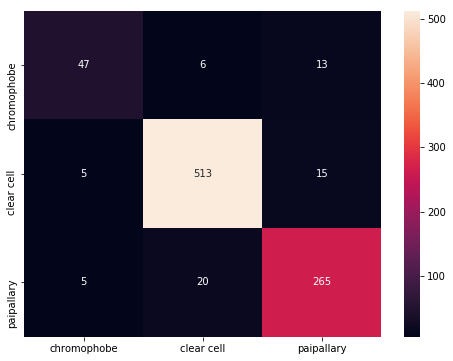

In [168]:
print("Time used for CV-5 model training: ", datetime.timedelta(seconds=round(t1-t0,0)))
conf = confusion_matrix(labels, y_pred)

FP = conf.sum(axis=0) - np.diag(conf)  
FN = conf.sum(axis=1) - np.diag(conf)
TP = np.diag(conf)
TN = conf.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

accuracy=np.sum(TP)/sum(sum(conf))
print('Accuracy : ', np.round(accuracy, 2))

sensitivities = TP/(TP+FN)
sensitivity_avg = np.mean(sensitivities)
print('Sensitivity : ', np.round(sensitivities, 3))
print('Sensitivity avg: ', np.round(sensitivity_avg, 3))

specificities = TN/(TN+FP)
specifity_avg = np.mean(specificities)
print('Specificity : ', np.round(specificities, 3))
print('Specificity avg : ', np.round(specifity_avg, 3))

pyplot.rcParams['figure.figsize'] = [8, 6]

# Specify columns
#columns = ['class {}'.format(i) for i in np.unique(labels)]
#columns = ['ductal', 'lobular']
#columns = ['biphasic' , 'epithelioid']
#columns = ['adeno' , 'mucinous', 'rectal']
columns = ['chromophobe' , 'clear cell', 'paipallary']
#columns = ['astro' , 'oligoastro', 'oligodendro']
#columns = ['lms', 'delipo', 'mfh', 'myxofibro', 'ups', 'mpnst']
#columns = ['classical', 'follicular', 'tall cell']
#columns = ['a1', 'ab', 'b1', 'b2', 'b3', 'c']
#columns = ['endometroid', 'mixed', 'serous']
#columns = ['mmmt', 'mmmt hetero', 'mmmt homo']


df_cm = pd.DataFrame(conf, index=columns, columns=columns)
conff = sn.heatmap(df_cm, annot=True, fmt="d");
conff;

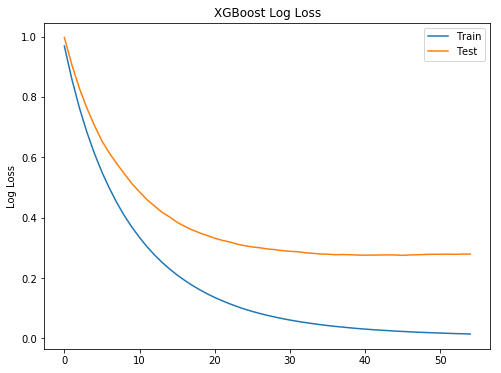

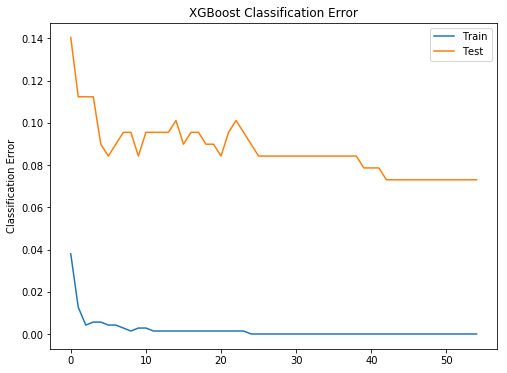

In [169]:
# retrieve performance metrics
if multi:
    error='merror'
    logloss='mlogloss'
else:
    error='error'
    logloss='logloss'
    
results = model.evals_result()
epochs = len(results['validation_0'][error])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0'][logloss], label='Train')
ax.plot(x_axis, results['validation_1'][logloss], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0'][error], label='Train')
ax.plot(x_axis, results['validation_1'][error], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

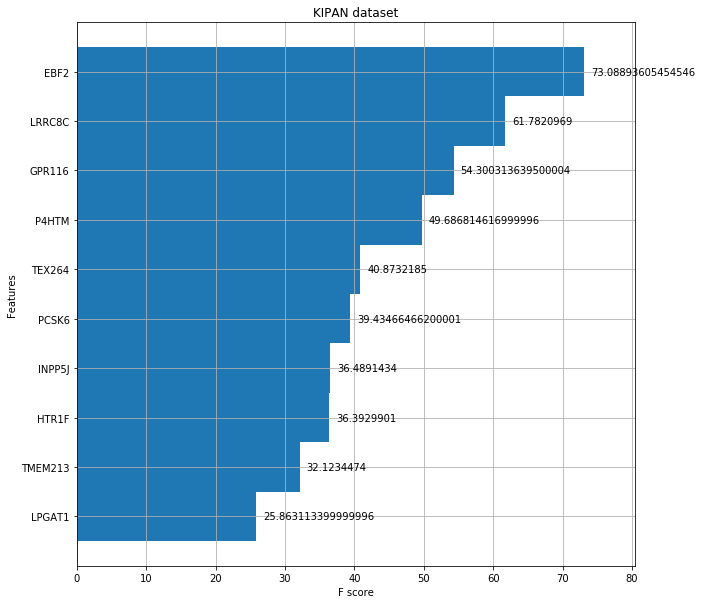

In [170]:
pyplot.rcParams['figure.figsize'] = [10, 10]
figg = plot_importance(model, importance_type='gain', max_num_features=10, height=1, title='KIPAN dataset')
figg;

In [163]:
#ax.figure.savefig('BRCA_errors.png')
figg.figure.savefig('UCS_importances.png')
#conff.figure.savefig('BRCA_confusion.png')